In [1]:
# Step 1: Install & Import Libraries
!pip install tensorflow
import tensorflow as tf
from tensorflow.keras import layers, models
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
import itertools

print("TensorFlow Version:", tf.__version__)


TensorFlow Version: 2.18.0


In [2]:
# Step 2: Load Fashion MNIST Dataset
fashion_mnist = tf.keras.datasets.fashion_mnist
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()

# Class labels
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']


29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [3]:
from google.colab import files
uploaded = files.upload()


Saving archive (7).zip to archive (7) (1).zip


In [4]:
import zipfile
import os

zip_path = "archive (7).zip"  # Change if file name is different
with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall("fashion_data")

print("Files extracted:")
print(os.listdir("fashion_data"))


Files extracted:
['train-images-idx3-ubyte', 'fashion-mnist_test.csv', 't10k-labels-idx1-ubyte', 't10k-images-idx3-ubyte', 'train-labels-idx1-ubyte', 'fashion-mnist_train.csv']


In [31]:
import pandas as pd

# Adjust filenames if necessary
HS_12 = pd.read_csv("fashion_data/fashion-mnist_train.csv")
HS_12 = pd.read_csv("fashion_data/fashion-mnist_test.csv")

print("Train shape:", HS_12.shape)
print("Test shape:", HS_12.shape)


Train shape: (10000, 785)
Test shape: (10000, 785)


In [32]:
# Split features and labels
X_train = HS_12.drop('label', axis=1).values
y_train = HS_12['label'].values

X_test = HS_12.drop('label', axis=1).values
y_test = HS_12['label'].values

# Normalize pixel values
X_train = X_train / 255.0
X_test = X_test / 255.0

# Reshape for CNN input (28x28x1)
X_train = X_train.reshape(-1, 28, 28, 1)
X_test = X_test.reshape(-1, 28, 28, 1)


In [8]:
import tensorflow as tf
from tensorflow.keras import layers, models

model = models.Sequential([
    layers.Conv2D(32, (3,3), activation='relu', input_shape=(28,28,1)),
    layers.MaxPooling2D(2, 2),
    layers.Conv2D(64, (3,3), activation='relu'),
    layers.MaxPooling2D(2, 2),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(10, activation='softmax')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.summary()


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 11, 11, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 1600)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       204,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 225,034 (879.04 KB)

 Trainable params: 225,034 (879.04 KB)

 Non-trainable params: 0 (0.00 B)

In [9]:
history = model.fit(X_train, y_train, epochs=10, validation_data=(X_test, y_test))


Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 58s 30ms/step - accuracy: 0.7701 - loss: 0.6316 - val_accuracy: 0.8734 - val_loss: 0.3498
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 52s 28ms/step - accuracy: 0.8855 - loss: 0.3183 - val_accuracy: 0.8810 - val_loss: 0.3032
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 82s 28ms/step - accuracy: 0.9033 - loss: 0.2639 - val_accuracy: 0.9092 - val_loss: 0.2481
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 82s 28ms/step - accuracy: 0.9145 - loss: 0.2281 - val_accuracy: 0.9082 - val_loss: 0.2499
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 52s 28ms/step - accuracy: 0.9279 - loss: 0.1981 - val_accuracy: 0.9152 - val_loss: 0.2296
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 82s 28ms/step - accuracy: 0.9376 - loss: 0.1665 - val_accuracy: 0.9141 - val_loss: 0.2390
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 82s 28ms/step - accuracy: 0.9415 - loss: 0.1536 - val_accuracy: 0.9030 - val_loss: 0.2757
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 55s 29ms/step - accuracy: 0.9486 -

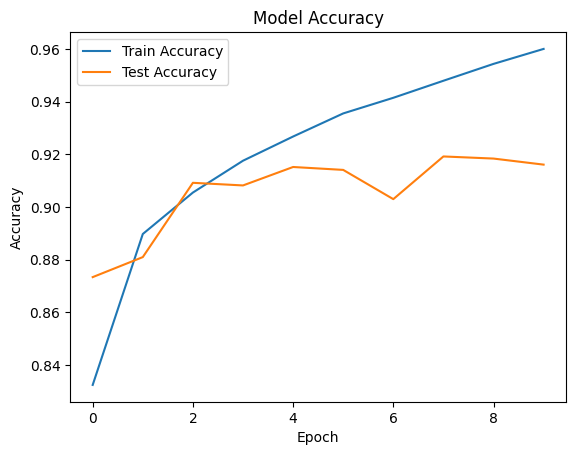

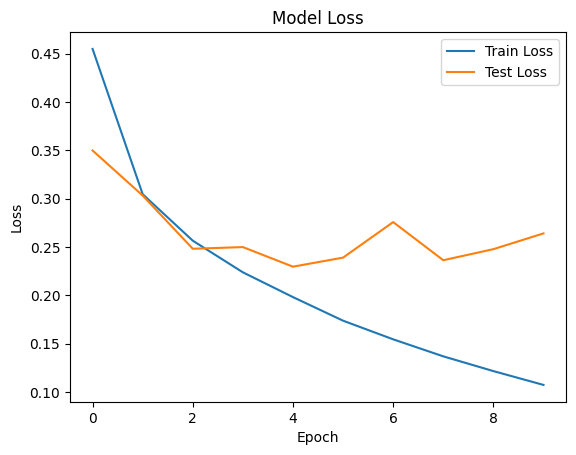

In [10]:
import matplotlib.pyplot as plt

# Accuracy plot
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Test Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Loss plot
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Test Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()


313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step


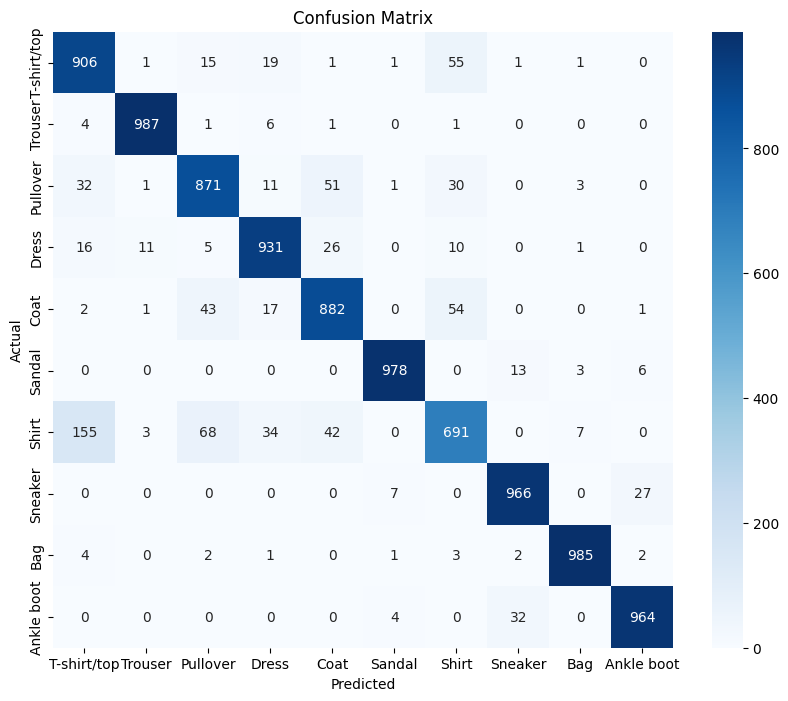

In [33]:
import numpy as np
from sklearn.metrics import confusion_matrix
import seaborn as sns

y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)

class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

cm = confusion_matrix(y_test, y_pred_classes)

plt.figure(figsize=(10,8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=class_names,
            yticklabels=class_names)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


In [34]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# You've already loaded data as X_train, y_train, X_test, y_test
# Assuming X_test and y_test will be used for validation


# Define data generator without flow_from_directory
datagen = ImageDataGenerator(
    rescale=1./255, # If not already done during preprocessing
    # ... other augmentations if needed ...
)
# This might be slightly inaccurate, but try the following:
# Fit the generator on your training data (if applying augmentations)
datagen.fit(X_train)


# Use datagen.flow for training data and separate X_test/y_test for validation:
train_generator = datagen.flow(
    X_train, y_train,
    batch_size=32,
    shuffle=True
)
# Validation data remains separate (X_test, y_test)

In [35]:
# You already have X_test and y_test from your previous code
X_val = X_test  # Use your existing X_test for validation
Y_true = y_test  # Use your existing y_test as true labels

# No need for val_generator or the loop

In [36]:
# Get predicted probabilities and classes
Y_pred = model.predict(X_val)  # Get predicted probabilities for all classes
Y_pred_classes = np.argmax(Y_pred, axis=1)  # Get the class with highest probability

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step


In [37]:
errors = Y_pred_classes != Y_true

# Extract misclassified predictions
Y_pred_classes_errors = Y_pred_classes[errors]
Y_pred_errors = Y_pred[errors]
Y_true_errors = Y_true[errors]
X_val_errors = X_val[errors]

In [38]:
def display_errors(errors_index, img_errors, pred_errors, obs_errors):
    """Displays 6 images with their predicted and actual labels"""
    n = 0
    nrows = 2
    ncols = 3
    fig, ax = plt.subplots(nrows, ncols, figsize=(12, 6), sharex=True, sharey=True)
    for row in range(nrows):
        for col in range(ncols):
            error = errors_index[n]
            ax[row, col].imshow(img_errors[error].reshape((28, 28)), cmap='gray')
            ax[row, col].set_title(f"Predicted: {class_names[int(pred_errors[error])]} \nTrue: {class_names[int(obs_errors[error])]}")
            ax[row, col].axis('off')
            n += 1

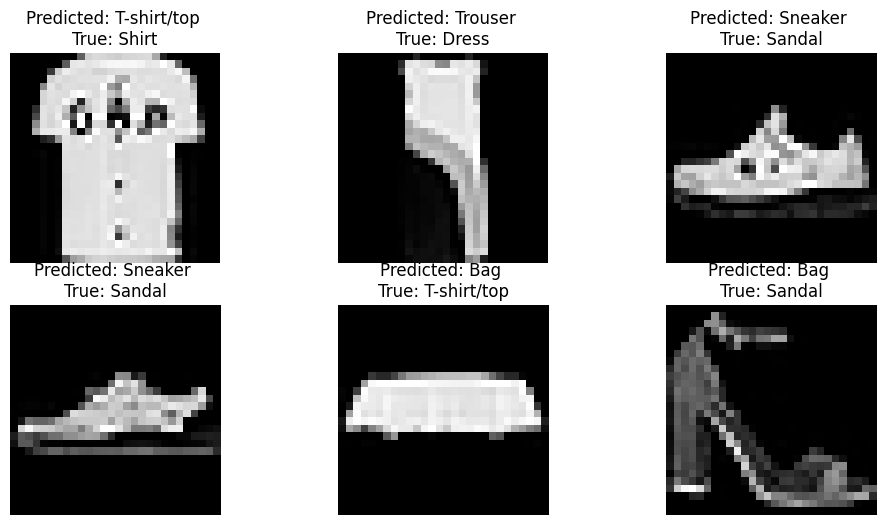

In [39]:
# Max predicted probability for the wrong class
Y_pred_errors_prob = np.max(Y_pred_errors, axis=1)

# Actual class probability in the wrong prediction
true_prob_errors = np.array([Y_pred_errors[i][int(Y_true_errors[i])] for i in range(len(Y_true_errors))])

# Difference in confidence between predicted and actual class
delta_pred_true_errors = Y_pred_errors_prob - true_prob_errors

# Sort by most confident mistakes
sorted_delta_errors = np.argsort(delta_pred_true_errors)
most_important_errors = sorted_delta_errors[-6:]

# Display them
display_errors(most_important_errors, X_val_errors, Y_pred_classes_errors, Y_true_errors)

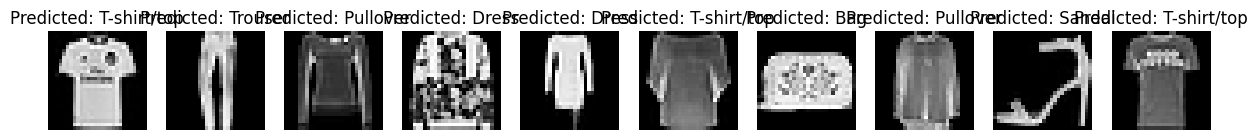

In [40]:
import matplotlib.pyplot as plt

# Assuming 'Y_pred_classes' contains predicted labels and 'X_test' contains test images
# Select a subset of images to display (e.g., the first 10)
num_images_to_display = 10
images = X_test[:num_images_to_display]
predicted_labels = Y_pred_classes[:num_images_to_display]

# Create a figure and axes for the images
fig, axes = plt.subplots(1, num_images_to_display, figsize=(15, 3))

# Iterate through the images and display them with their predicted labels
for i, ax in enumerate(axes):
    ax.imshow(images[i].reshape(28, 28), cmap='gray')  # Reshape and display the image
    ax.set_title(f"Predicted: {class_names[predicted_labels[i]]}")  # Set the title with the predicted label
    ax.axis('off')  # Turn off the axes

plt.show()  # Show the figure

In [42]:
model.save("fashion_mnist_model.h5")


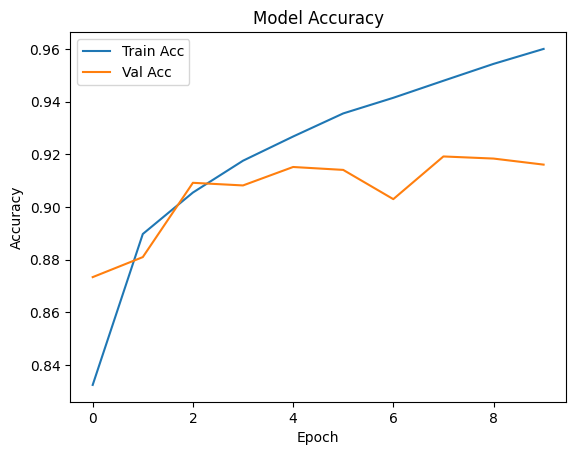

In [43]:
plt.plot(history.history['accuracy'], label='Train Acc')
plt.plot(history.history['val_accuracy'], label='Val Acc')
plt.title("Model Accuracy")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend()
plt.show()
